# QR Code Detection Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install libraries

In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00


In [3]:
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [4]:
import os
os.chdir("/content/drive/MyDrive/QR_CODE_DETECTOR")

## Load dataset from roboflow

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="API-KEY")
project = rf.workspace("qr-lmsul").project("qr-code-detection-jz2e3")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.91, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to qr-code-detection-2 in yolov8:: 100%|██████████| 3106/3106 [00:28<00:00, 109.31it/s]


## Train a YoloV8 model on custom dataset

In [ ]:
from ultralytics import YOLO

os.chdir("/content/drive/MyDrive/QR_CODE_DETECTOR/datasets")
path_data = "data.yaml"

model = YOLO('yolov8m.pt')  # load a pretrained YOLOv8m detection model
model.train(data=path_data, epochs=150, imgsz=640)  # train the model

Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

100%|██████████| 755k/755k [00:00<00:00, 15.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 75.4MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/QR_CODE_DETECTOR/datasets/train/labels... 1083 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1083/1083 [00:19<00:00, 55.48it/s]


train: New cache created: /content/drive/MyDrive/QR_CODE_DETECTOR/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/drive/MyDrive/QR_CODE_DETECTOR/datasets/valid/labels... 309 images, 0 backgrounds, 0 corrupt: 100%|██████████| 309/309 [00:08<00:00, 36.47it/s]


val: New cache created: /content/drive/MyDrive/QR_CODE_DETECTOR/datasets/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      6.95G      1.219      1.515       1.36         23        640: 100%|██████████| 68/68 [00:46<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]

                   all        309        508     0.0568      0.689     0.0506     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      6.74G       1.29      1.182      1.419         37        640: 100%|██████████| 68/68 [00:44<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.32it/s]

                   all        309        508     0.0151      0.665     0.0125    0.00626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      6.63G      1.376      1.201      1.458         23        640: 100%|██████████| 68/68 [00:41<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        309        508      0.464      0.516      0.402      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      6.78G      1.309      1.115      1.414         19        640: 100%|██████████| 68/68 [00:42<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]

                   all        309        508    0.00629      0.516    0.00492    0.00271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      6.79G      1.245      1.012      1.359         29        640: 100%|██████████| 68/68 [00:40<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        309        508      0.684       0.67      0.696      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      6.79G      1.226      1.012      1.372         25        640: 100%|██████████| 68/68 [00:43<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

                   all        309        508      0.868      0.843      0.892      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      6.75G      1.185      0.951       1.35         20        640: 100%|██████████| 68/68 [00:41<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        309        508      0.775      0.782      0.834      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      6.75G      1.102     0.8776      1.295         25        640: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]

                   all        309        508      0.867      0.886      0.921      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      6.79G      1.089     0.8366      1.258         33        640: 100%|██████████| 68/68 [00:42<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]

                   all        309        508      0.885      0.778      0.879      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      6.77G      1.079     0.8325       1.25         33        640: 100%|██████████| 68/68 [00:40<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.21it/s]

                   all        309        508        0.9      0.872      0.928      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      6.75G       1.02     0.7642       1.23         32        640: 100%|██████████| 68/68 [00:42<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        309        508       0.93      0.909      0.944      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      6.73G      1.006     0.7264      1.225         20        640: 100%|██████████| 68/68 [00:41<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]

                   all        309        508       0.88      0.862      0.921      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      6.78G      1.034     0.7355      1.232         21        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]

                   all        309        508      0.917      0.889       0.94      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      6.78G      1.027     0.7467      1.246         25        640: 100%|██████████| 68/68 [00:41<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

                   all        309        508      0.934      0.884      0.942      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      6.78G      1.042     0.7414      1.236         57        640: 100%|██████████| 68/68 [00:44<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        309        508      0.928      0.936      0.958      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      6.78G     0.9839     0.7018      1.225         23        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]

                   all        309        508      0.932      0.931      0.961      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      6.83G     0.9726      0.685      1.199         26        640: 100%|██████████| 68/68 [00:41<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        309        508      0.962      0.919      0.956      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150       6.8G     0.9424     0.6461      1.186         27        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        309        508      0.932      0.943      0.949      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150       6.8G     0.9403      0.675      1.194         19        640: 100%|██████████| 68/68 [00:43<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        309        508      0.947      0.933      0.948       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      7.05G     0.9352     0.6692      1.174         47        640: 100%|██████████| 68/68 [00:40<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]

                   all        309        508      0.959      0.931      0.967      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      6.78G     0.9031     0.6137      1.162         25        640: 100%|██████████| 68/68 [00:41<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]

                   all        309        508      0.938      0.969      0.971      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      6.78G     0.9092     0.6153      1.164         20        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

                   all        309        508      0.932      0.949       0.97      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150       6.8G     0.8853     0.6127      1.165         31        640: 100%|██████████| 68/68 [00:41<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        309        508      0.944      0.931       0.96      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      6.78G     0.9001      0.603      1.154         20        640: 100%|██████████| 68/68 [00:42<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]

                   all        309        508       0.95      0.937      0.972      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150       6.8G     0.8938     0.6216      1.155         26        640: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]

                   all        309        508      0.965      0.941      0.965      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      6.78G     0.8557      0.592      1.124         24        640: 100%|██████████| 68/68 [00:40<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        309        508      0.973      0.935      0.973      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      6.78G     0.8445     0.5642      1.118         34        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.33it/s]

                   all        309        508      0.973      0.936      0.976      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      6.78G     0.8619     0.5784      1.136         32        640: 100%|██████████| 68/68 [00:43<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]

                   all        309        508      0.958      0.946      0.969      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      6.78G     0.8311     0.5715      1.134         72        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]

                   all        309        508      0.962      0.939       0.97      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      6.82G     0.8418     0.5723      1.138         28        640: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        309        508      0.963      0.945      0.978       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      6.83G     0.8038     0.5472      1.104         27        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        309        508      0.951      0.943      0.969      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      6.78G     0.8215     0.5459      1.121         27        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        309        508      0.952      0.933      0.964      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      6.78G     0.7833     0.5502      1.114         25        640: 100%|██████████| 68/68 [00:41<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        309        508      0.955      0.959       0.97      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      6.78G     0.8311     0.5509      1.125         49        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.01it/s]

                   all        309        508      0.961      0.953      0.976      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      6.78G     0.7811     0.5111      1.102         36        640: 100%|██████████| 68/68 [00:40<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        309        508      0.971      0.953      0.975      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      6.78G     0.8017     0.5229      1.104         33        640: 100%|██████████| 68/68 [00:41<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        309        508      0.973      0.951      0.977      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      6.78G      0.784     0.5321      1.094         34        640: 100%|██████████| 68/68 [00:42<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]

                   all        309        508      0.968      0.953       0.97      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      6.78G     0.7831     0.5393      1.089         31        640: 100%|██████████| 68/68 [00:40<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]

                   all        309        508      0.962      0.937      0.974      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      6.78G     0.7792     0.5219      1.104         50        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        309        508      0.968      0.952      0.963      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      6.87G     0.7612     0.4976      1.098         24        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]

                   all        309        508      0.964      0.959      0.973      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      6.78G     0.7905     0.4978      1.084         41        640: 100%|██████████| 68/68 [00:40<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]

                   all        309        508      0.961      0.959      0.975      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      6.78G     0.7512     0.4939      1.072         29        640: 100%|██████████| 68/68 [00:42<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        309        508      0.963      0.957      0.975      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      6.78G     0.7721     0.4962      1.084         27        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        309        508      0.942      0.953      0.964      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      6.83G     0.7536     0.5057      1.081         94        640: 100%|██████████| 68/68 [00:39<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        309        508      0.964      0.945      0.974      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      6.75G     0.7551     0.4915       1.08         49        640: 100%|██████████| 68/68 [00:40<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]

                   all        309        508      0.962      0.942      0.964      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      6.78G     0.7488     0.5122       1.06         28        640: 100%|██████████| 68/68 [00:42<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

                   all        309        508      0.977       0.93      0.972       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      6.78G     0.7202     0.4794      1.056         25        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]

                   all        309        508      0.974      0.947      0.974       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      6.83G     0.7315     0.4769      1.066         23        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        309        508      0.973       0.94      0.966       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      6.81G     0.7324     0.4674      1.081         26        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]

                   all        309        508      0.973      0.939      0.969      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      6.81G     0.7112     0.4555      1.041         24        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        309        508      0.951      0.965      0.975      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      6.83G     0.7406     0.4732      1.072         15        640: 100%|██████████| 68/68 [00:44<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]

                   all        309        508      0.965      0.949      0.959      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      6.78G     0.7057     0.4694      1.059         37        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]

                   all        309        508      0.976      0.957      0.979      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      6.78G      0.682     0.4563       1.04         28        640: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

                   all        309        508      0.973      0.949      0.969      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      6.89G     0.6949     0.4511      1.058         25        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

                   all        309        508      0.972      0.953      0.972      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      6.78G     0.7162     0.4653      1.069         40        640: 100%|██████████| 68/68 [00:42<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        309        508      0.977      0.937      0.969      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      6.78G     0.6748     0.4404      1.038         20        640: 100%|██████████| 68/68 [00:40<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

                   all        309        508      0.964       0.96      0.977      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      6.79G     0.6809     0.4302       1.04         14        640: 100%|██████████| 68/68 [00:40<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

                   all        309        508       0.97      0.957      0.977      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      6.78G       0.67     0.4346       1.03         38        640: 100%|██████████| 68/68 [00:40<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]

                   all        309        508      0.986      0.945      0.981        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      6.88G     0.6971     0.4494      1.049         26        640: 100%|██████████| 68/68 [00:40<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        309        508      0.969      0.943      0.977      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      6.78G     0.6734     0.4315      1.035         27        640: 100%|██████████| 68/68 [00:43<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]

                   all        309        508      0.976      0.953      0.979      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150       6.8G     0.6847     0.4295      1.047         25        640: 100%|██████████| 68/68 [00:40<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        309        508      0.974      0.955      0.973      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      6.78G     0.6602     0.4301      1.039         27        640: 100%|██████████| 68/68 [00:40<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        309        508      0.968      0.963      0.977      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      6.79G     0.6518      0.429      1.029         28        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]

                   all        309        508      0.959      0.959      0.964      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      6.89G     0.6678     0.4141      1.016         18        640: 100%|██████████| 68/68 [00:42<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]

                   all        309        508      0.974      0.958      0.977      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      6.78G     0.6687     0.4234      1.042         30        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        309        508      0.963      0.962      0.979      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150       6.8G     0.6523     0.4319      1.014         38        640: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.47it/s]

                   all        309        508      0.971      0.959       0.98      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      6.78G     0.6546     0.4219      1.018         22        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        309        508      0.966      0.945      0.974      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150       6.8G     0.6673     0.4115      1.027         23        640: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

                   all        309        508      0.977      0.955      0.972      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      6.78G     0.6698     0.4234      1.026         81        640: 100%|██████████| 68/68 [00:42<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

                   all        309        508      0.968       0.96      0.977      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      6.78G     0.6231     0.4032      1.023         33        640: 100%|██████████| 68/68 [00:40<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        309        508      0.972      0.959      0.978      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      6.78G     0.6395     0.4016       1.01         25        640: 100%|██████████| 68/68 [00:39<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]

                   all        309        508      0.979      0.951      0.978      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150       6.8G     0.6016      0.385      1.012         36        640: 100%|██████████| 68/68 [00:40<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]

                   all        309        508      0.976      0.948      0.967      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150       6.8G     0.6387     0.4045      1.018         79        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        309        508       0.98      0.955      0.972       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      6.78G     0.6216     0.3974       1.01         24        640: 100%|██████████| 68/68 [00:41<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        309        508      0.959      0.964      0.972      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      6.78G      0.619     0.3937      1.013         19        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]

                   all        309        508      0.968       0.96      0.979      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      6.78G     0.6518     0.4036       1.03         42        640: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]

                   all        309        508      0.972      0.963      0.977      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150       6.8G     0.6099      0.384      1.007         30        640: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]

                   all        309        508      0.972      0.958      0.978      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      6.78G     0.6009     0.3852      1.005         29        640: 100%|██████████| 68/68 [00:43<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]

                   all        309        508      0.984      0.944      0.978      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      6.81G     0.6222      0.398      1.004         27        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

                   all        309        508      0.981      0.957      0.982      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      6.78G     0.6003      0.389     0.9912         14        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]

                   all        309        508       0.98      0.963      0.978       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      6.78G     0.6245     0.3791      1.001         43        640: 100%|██████████| 68/68 [00:40<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        309        508      0.958      0.941      0.976      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      6.78G     0.5932     0.3977     0.9905         29        640: 100%|██████████| 68/68 [00:40<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.16it/s]

                   all        309        508      0.973      0.951      0.978      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150       6.8G     0.5932     0.3689      1.004         27        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]

                   all        309        508      0.974      0.946       0.98      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      6.91G     0.6016     0.3856      1.004         19        640: 100%|██████████| 68/68 [00:41<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        309        508      0.967      0.943      0.978      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      6.79G     0.5851     0.3681      0.995         52        640: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

                   all        309        508      0.971      0.949      0.975      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      6.82G     0.5976     0.3778     0.9976         32        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        309        508      0.976      0.952      0.974      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      6.78G     0.6117     0.3939      1.015         24        640: 100%|██████████| 68/68 [00:43<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        309        508      0.974      0.957       0.98      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      6.78G     0.5719     0.3551     0.9865         28        640: 100%|██████████| 68/68 [00:41<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        309        508      0.969      0.951      0.978      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      6.78G     0.5745     0.3563     0.9784         18        640: 100%|██████████| 68/68 [00:41<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        309        508      0.969      0.943      0.977      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      6.78G     0.5582     0.3463     0.9885         20        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]

                   all        309        508      0.973      0.953      0.978      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      6.82G     0.5715     0.3659     0.9988         25        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.18it/s]

                   all        309        508      0.976      0.949      0.978      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150       6.8G     0.5701     0.3546     0.9766         41        640: 100%|██████████| 68/68 [00:39<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]

                   all        309        508      0.977      0.961      0.979      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      6.78G      0.564      0.365     0.9802         34        640: 100%|██████████| 68/68 [00:41<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]

                   all        309        508      0.984      0.966      0.982      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      6.78G     0.5704     0.3611     0.9899         30        640: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        309        508      0.976      0.955      0.981      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      6.78G     0.5718     0.3505     0.9787         36        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

                   all        309        508      0.968       0.96      0.977      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      6.78G     0.5614     0.3501     0.9852         23        640: 100%|██████████| 68/68 [00:42<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        309        508      0.978      0.952      0.976       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      6.78G      0.556     0.3485     0.9853         46        640: 100%|██████████| 68/68 [00:39<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        309        508      0.976      0.961      0.979      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      6.83G     0.5525     0.3386     0.9794         21        640: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]

                   all        309        508       0.97      0.955      0.977      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      6.73G      0.572     0.3537      0.983         30        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

                   all        309        508       0.97      0.963       0.98      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150       6.8G     0.5739     0.3527      0.979         16        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        309        508      0.974      0.959      0.981      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      6.78G     0.5382     0.3368     0.9587         33        640: 100%|██████████| 68/68 [00:44<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        309        508      0.982      0.956       0.98       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      7.01G     0.5646     0.3493     0.9782         30        640: 100%|██████████| 68/68 [00:41<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]

                   all        309        508       0.98      0.959      0.979      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      6.83G     0.5344     0.3371     0.9712         94        640: 100%|██████████| 68/68 [00:41<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        309        508      0.972      0.966       0.98      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      6.78G     0.5665     0.3392     0.9808         20        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]

                   all        309        508      0.976      0.945      0.978       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      6.78G     0.5258     0.3394     0.9723         22        640: 100%|██████████| 68/68 [00:43<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        309        508      0.978      0.965      0.984      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      6.78G     0.5453     0.3459     0.9788        104        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        309        508       0.98      0.957       0.98      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      6.78G     0.5392     0.3303     0.9619         23        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  2.00it/s]

                   all        309        508      0.989      0.953       0.98      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150       6.8G     0.5341     0.3347     0.9653         19        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        309        508      0.986      0.952      0.981      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150       6.8G     0.5289     0.3301     0.9637         16        640: 100%|██████████| 68/68 [00:40<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        309        508      0.965      0.967      0.983      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      6.78G     0.5159     0.3252     0.9631         30        640: 100%|██████████| 68/68 [00:44<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        309        508      0.983      0.959      0.981       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      6.79G      0.536      0.328     0.9654         16        640: 100%|██████████| 68/68 [00:40<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]

                   all        309        508      0.985      0.963      0.982      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      6.73G     0.5233     0.3252     0.9635         18        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]

                   all        309        508      0.978      0.954      0.978       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      6.79G     0.5304     0.3195     0.9574         27        640: 100%|██████████| 68/68 [00:40<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        309        508      0.979      0.965      0.978      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      6.78G     0.5174     0.3285     0.9583         32        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        309        508       0.98      0.955      0.979      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      6.78G     0.5253     0.3267      0.967         30        640: 100%|██████████| 68/68 [00:40<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        309        508      0.982      0.965      0.981      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      6.78G      0.526     0.3168     0.9531         39        640: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        309        508      0.981      0.955      0.978      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      6.78G     0.5109     0.3226     0.9506         27        640: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]

                   all        309        508      0.976      0.947      0.981      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      6.78G     0.5214     0.3156     0.9584         22        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

                   all        309        508      0.988      0.949       0.98      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      6.79G     0.5051     0.3144      0.946         22        640: 100%|██████████| 68/68 [00:43<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        309        508      0.976      0.962       0.98       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      6.83G     0.4982      0.313     0.9528         32        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]

                   all        309        508      0.973      0.963      0.979      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      6.83G      0.514     0.3104     0.9474         28        640: 100%|██████████| 68/68 [00:40<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        309        508      0.978      0.963      0.981      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      6.79G     0.4917     0.3014     0.9456         11        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]

                   all        309        508      0.982      0.963      0.981      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150       6.8G     0.5132     0.3119     0.9561         26        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        309        508      0.968      0.965      0.982      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      6.78G     0.4827     0.2986     0.9391         30        640: 100%|██████████| 68/68 [00:43<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

                   all        309        508      0.974      0.968      0.982      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      6.78G     0.4796     0.2951     0.9478         25        640: 100%|██████████| 68/68 [00:41<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        309        508      0.984       0.96      0.982      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      6.78G     0.4983     0.3046     0.9531         22        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.31it/s]

                   all        309        508      0.974      0.963      0.981      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      6.78G     0.4617      0.291     0.9351         28        640: 100%|██████████| 68/68 [00:41<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        309        508      0.984      0.965      0.981      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150       6.8G     0.4903     0.3021     0.9445         31        640: 100%|██████████| 68/68 [00:42<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]

                   all        309        508      0.972      0.963       0.98      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150       6.8G       0.47      0.286     0.9357         25        640: 100%|██████████| 68/68 [00:40<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

                   all        309        508      0.984      0.963       0.98      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      6.83G     0.4671      0.292     0.9342         27        640: 100%|██████████| 68/68 [00:41<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]

                   all        309        508       0.98      0.963      0.977      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      6.78G     0.4763     0.2916      0.936         76        640: 100%|██████████| 68/68 [00:39<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

                   all        309        508      0.984      0.957      0.978      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      6.78G     0.4668     0.2932     0.9372         23        640: 100%|██████████| 68/68 [00:41<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        309        508      0.982      0.959      0.982      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      6.81G     0.4642     0.2802     0.9341         22        640: 100%|██████████| 68/68 [00:43<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]

                   all        309        508      0.978      0.969      0.982      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      6.78G      0.474     0.2829     0.9341         21        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

                   all        309        508      0.985      0.959      0.982      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      6.78G     0.4634      0.276     0.9251         28        640: 100%|██████████| 68/68 [00:41<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        309        508      0.979      0.961      0.981      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      6.78G     0.4495     0.2858     0.9377         27        640: 100%|██████████| 68/68 [00:41<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

                   all        309        508      0.975      0.957       0.98      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      6.72G     0.4696     0.2808     0.9322         40        640: 100%|██████████| 68/68 [00:41<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        309        508      0.966      0.967      0.982      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      6.78G     0.4553     0.2788     0.9232         29        640: 100%|██████████| 68/68 [00:43<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.68it/s]

                   all        309        508      0.979      0.963      0.984      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150       6.8G     0.4336      0.268     0.9331         30        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

                   all        309        508      0.986      0.959      0.983      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      6.83G     0.4465     0.2752     0.9266         36        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]

                   all        309        508      0.981      0.963      0.983      0.874


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      6.77G     0.4059     0.2319     0.8841         17        640: 100%|██████████| 68/68 [00:43<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]

                   all        309        508       0.98      0.957      0.981      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      6.78G     0.3932     0.2246     0.8795         22        640: 100%|██████████| 68/68 [00:40<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

                   all        309        508      0.986      0.959      0.982      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      6.78G     0.3871     0.2219      0.878         15        640: 100%|██████████| 68/68 [00:43<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]

                   all        309        508      0.985      0.965      0.983      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      6.78G     0.3812     0.2174     0.8847         14        640: 100%|██████████| 68/68 [00:41<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        309        508      0.987      0.965      0.984      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      6.78G     0.3886     0.2202     0.8779         19        640: 100%|██████████| 68/68 [00:40<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.40it/s]

                   all        309        508      0.988      0.967      0.982      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      6.78G     0.3842     0.2166      0.879         15        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        309        508      0.982      0.967      0.982      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      6.78G     0.3749     0.2112     0.8684         13        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        309        508      0.985      0.959      0.983      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      6.87G     0.3792     0.2144     0.8725         17        640: 100%|██████████| 68/68 [00:41<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        309        508      0.988      0.963      0.982      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      6.78G     0.3813     0.2124     0.8724         16        640: 100%|██████████| 68/68 [00:41<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]

                   all        309        508      0.986      0.965      0.983      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      6.78G     0.3701     0.2096     0.8751         30        640: 100%|██████████| 68/68 [00:40<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]

                   all        309        508      0.987      0.965      0.982      0.876



150 epochs completed in 2.072 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:12<00:00,  1.26s/it]


                   all        309        508       0.98      0.964      0.984      0.879
Speed: 0.4ms preprocess, 10.6ms inference, 0.0ms loss, 8.5ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd2903597b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Evaluation of model metrics

### Confusion Matrix

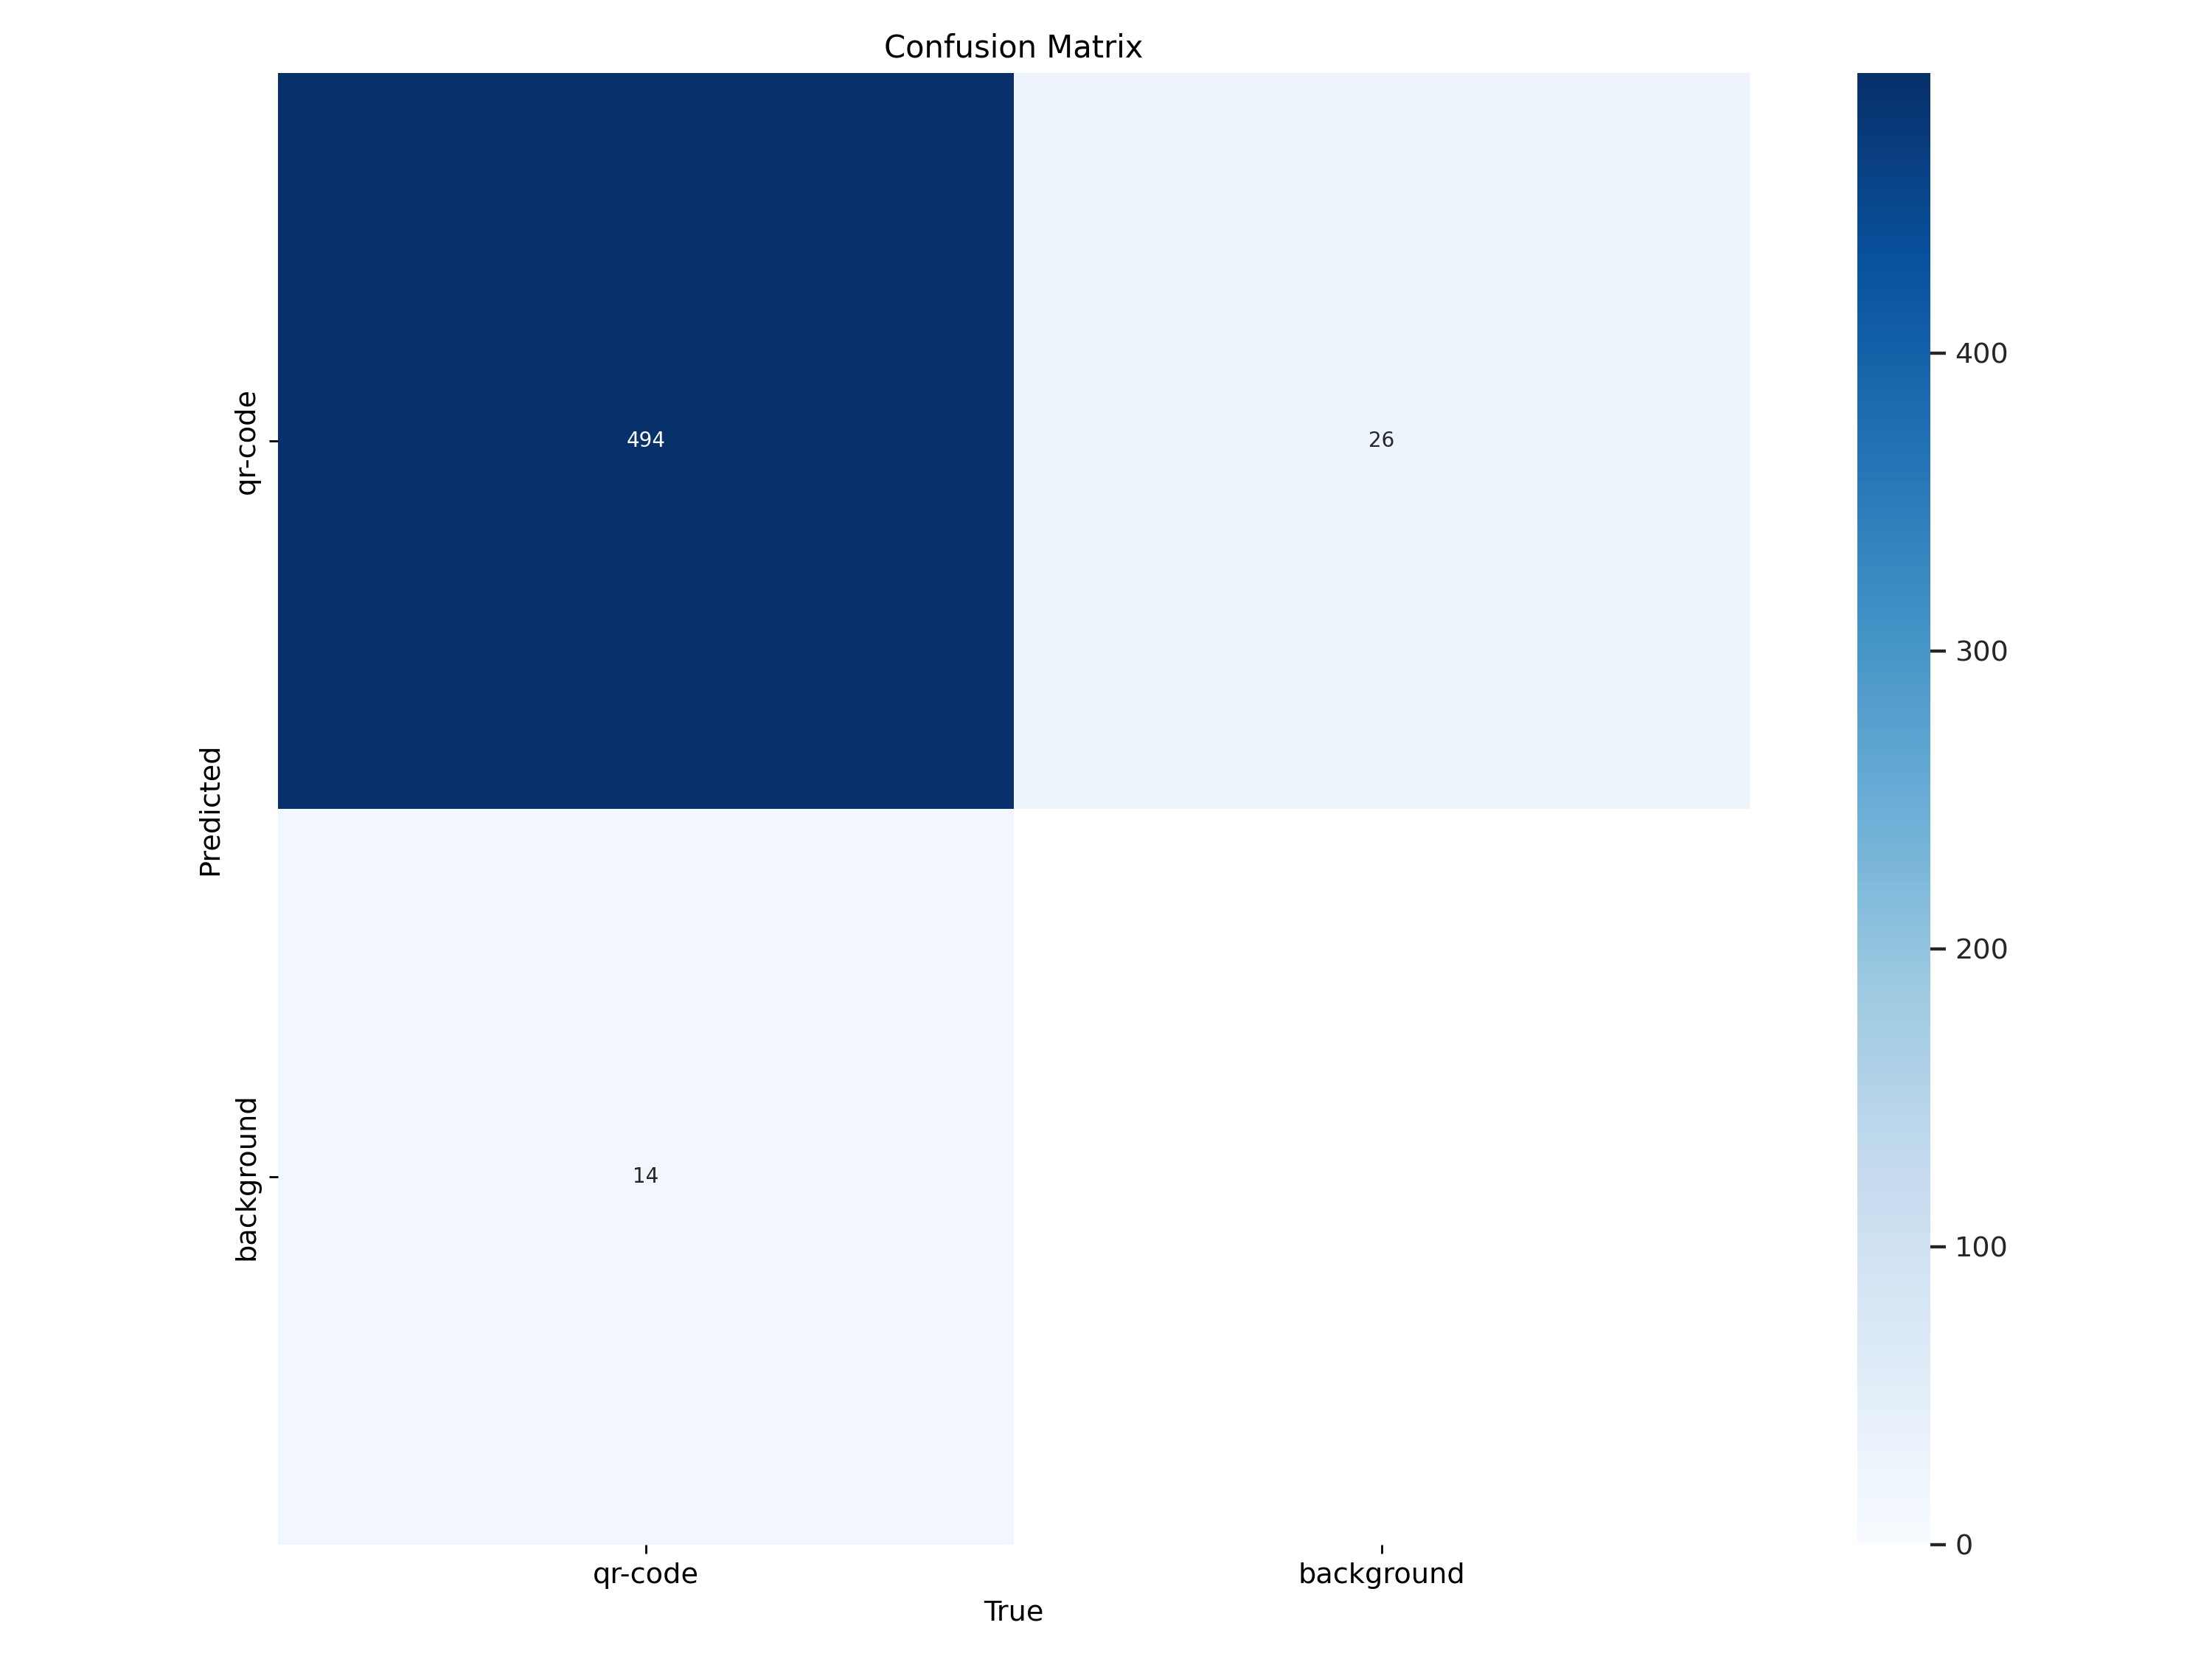

In [ ]:
from IPython.display import display, Image
from IPython import display
display.clear_output()

Image(filename=f'/content/drive/MyDrive/QR_CODE_DETECTOR/datasets/runs/detect/train2/confusion_matrix.png')

### Loss function

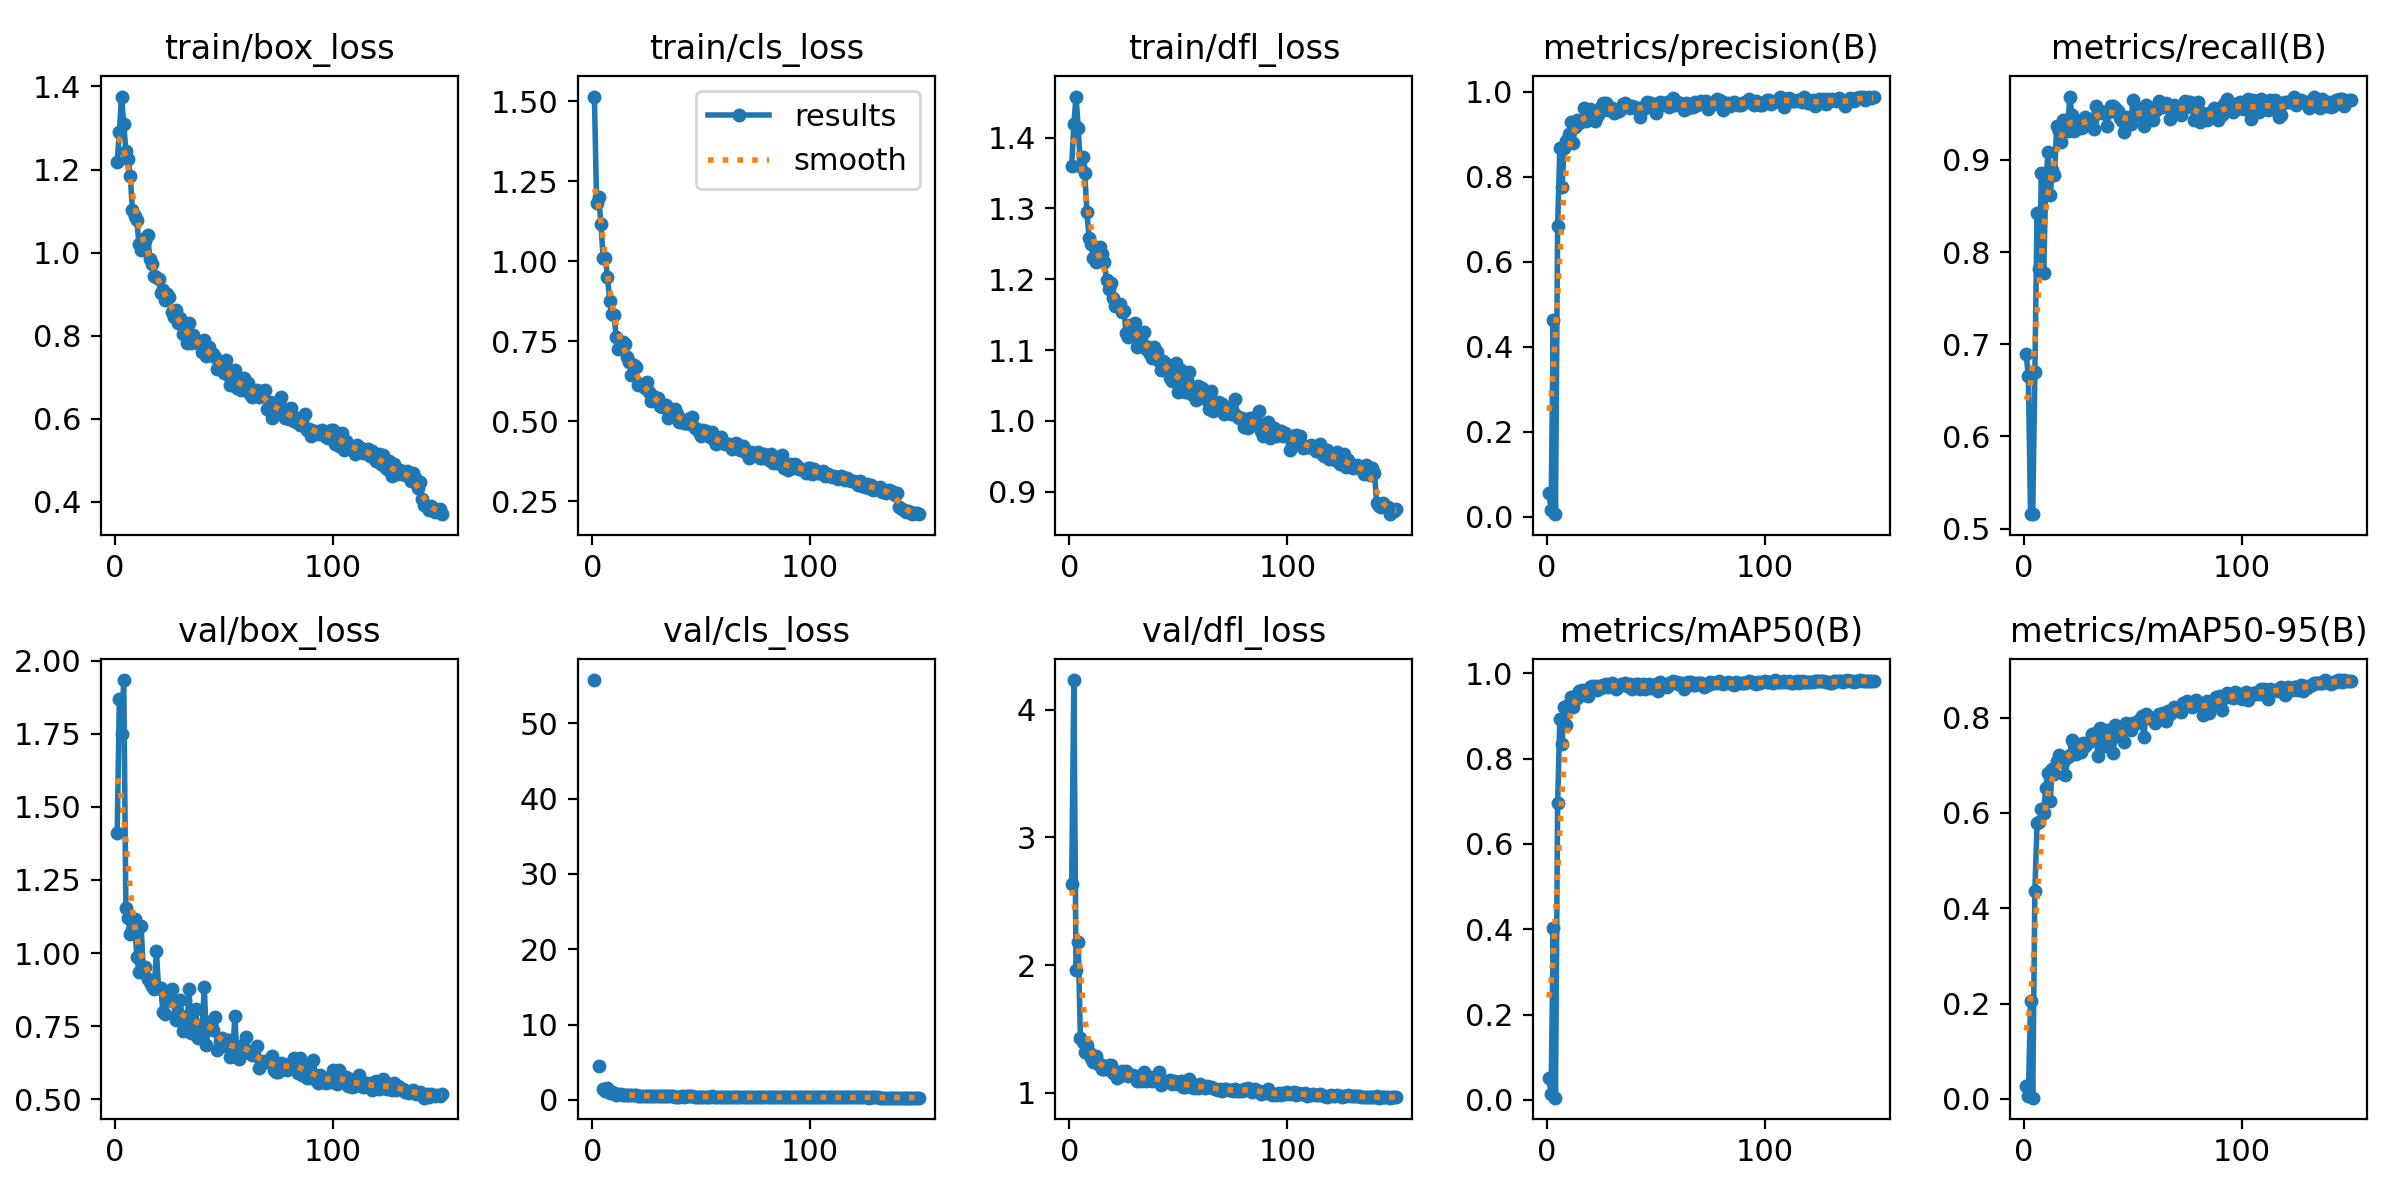

In [ ]:
Image(filename=f'/content/drive/MyDrive/QR_CODE_DETECTOR/datasets/runs/detect/train2/results.png')

### Model performance on Validation set

In [ ]:
 # evaluate model performance on the validation set
from ultralytics import YOLO
os.chdir("/content/drive/MyDrive/QR_CODE_DETECTOR/datasets")

model = YOLO("/content/drive/MyDrive/QR_CODE_DETECTOR/datasets/runs/detect/train2/weights/best.pt")
results = model.val()

Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 23.3MB/s]
val: Scanning /content/drive/MyDrive/QR_CODE_DETECTOR/datasets/valid/labels.cache... 309 images, 0 backgrounds, 0 corrupt: 100%|██████████| 309/309 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


                   all        309        508      0.979      0.963      0.984      0.878
Speed: 2.9ms preprocess, 22.2ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/val


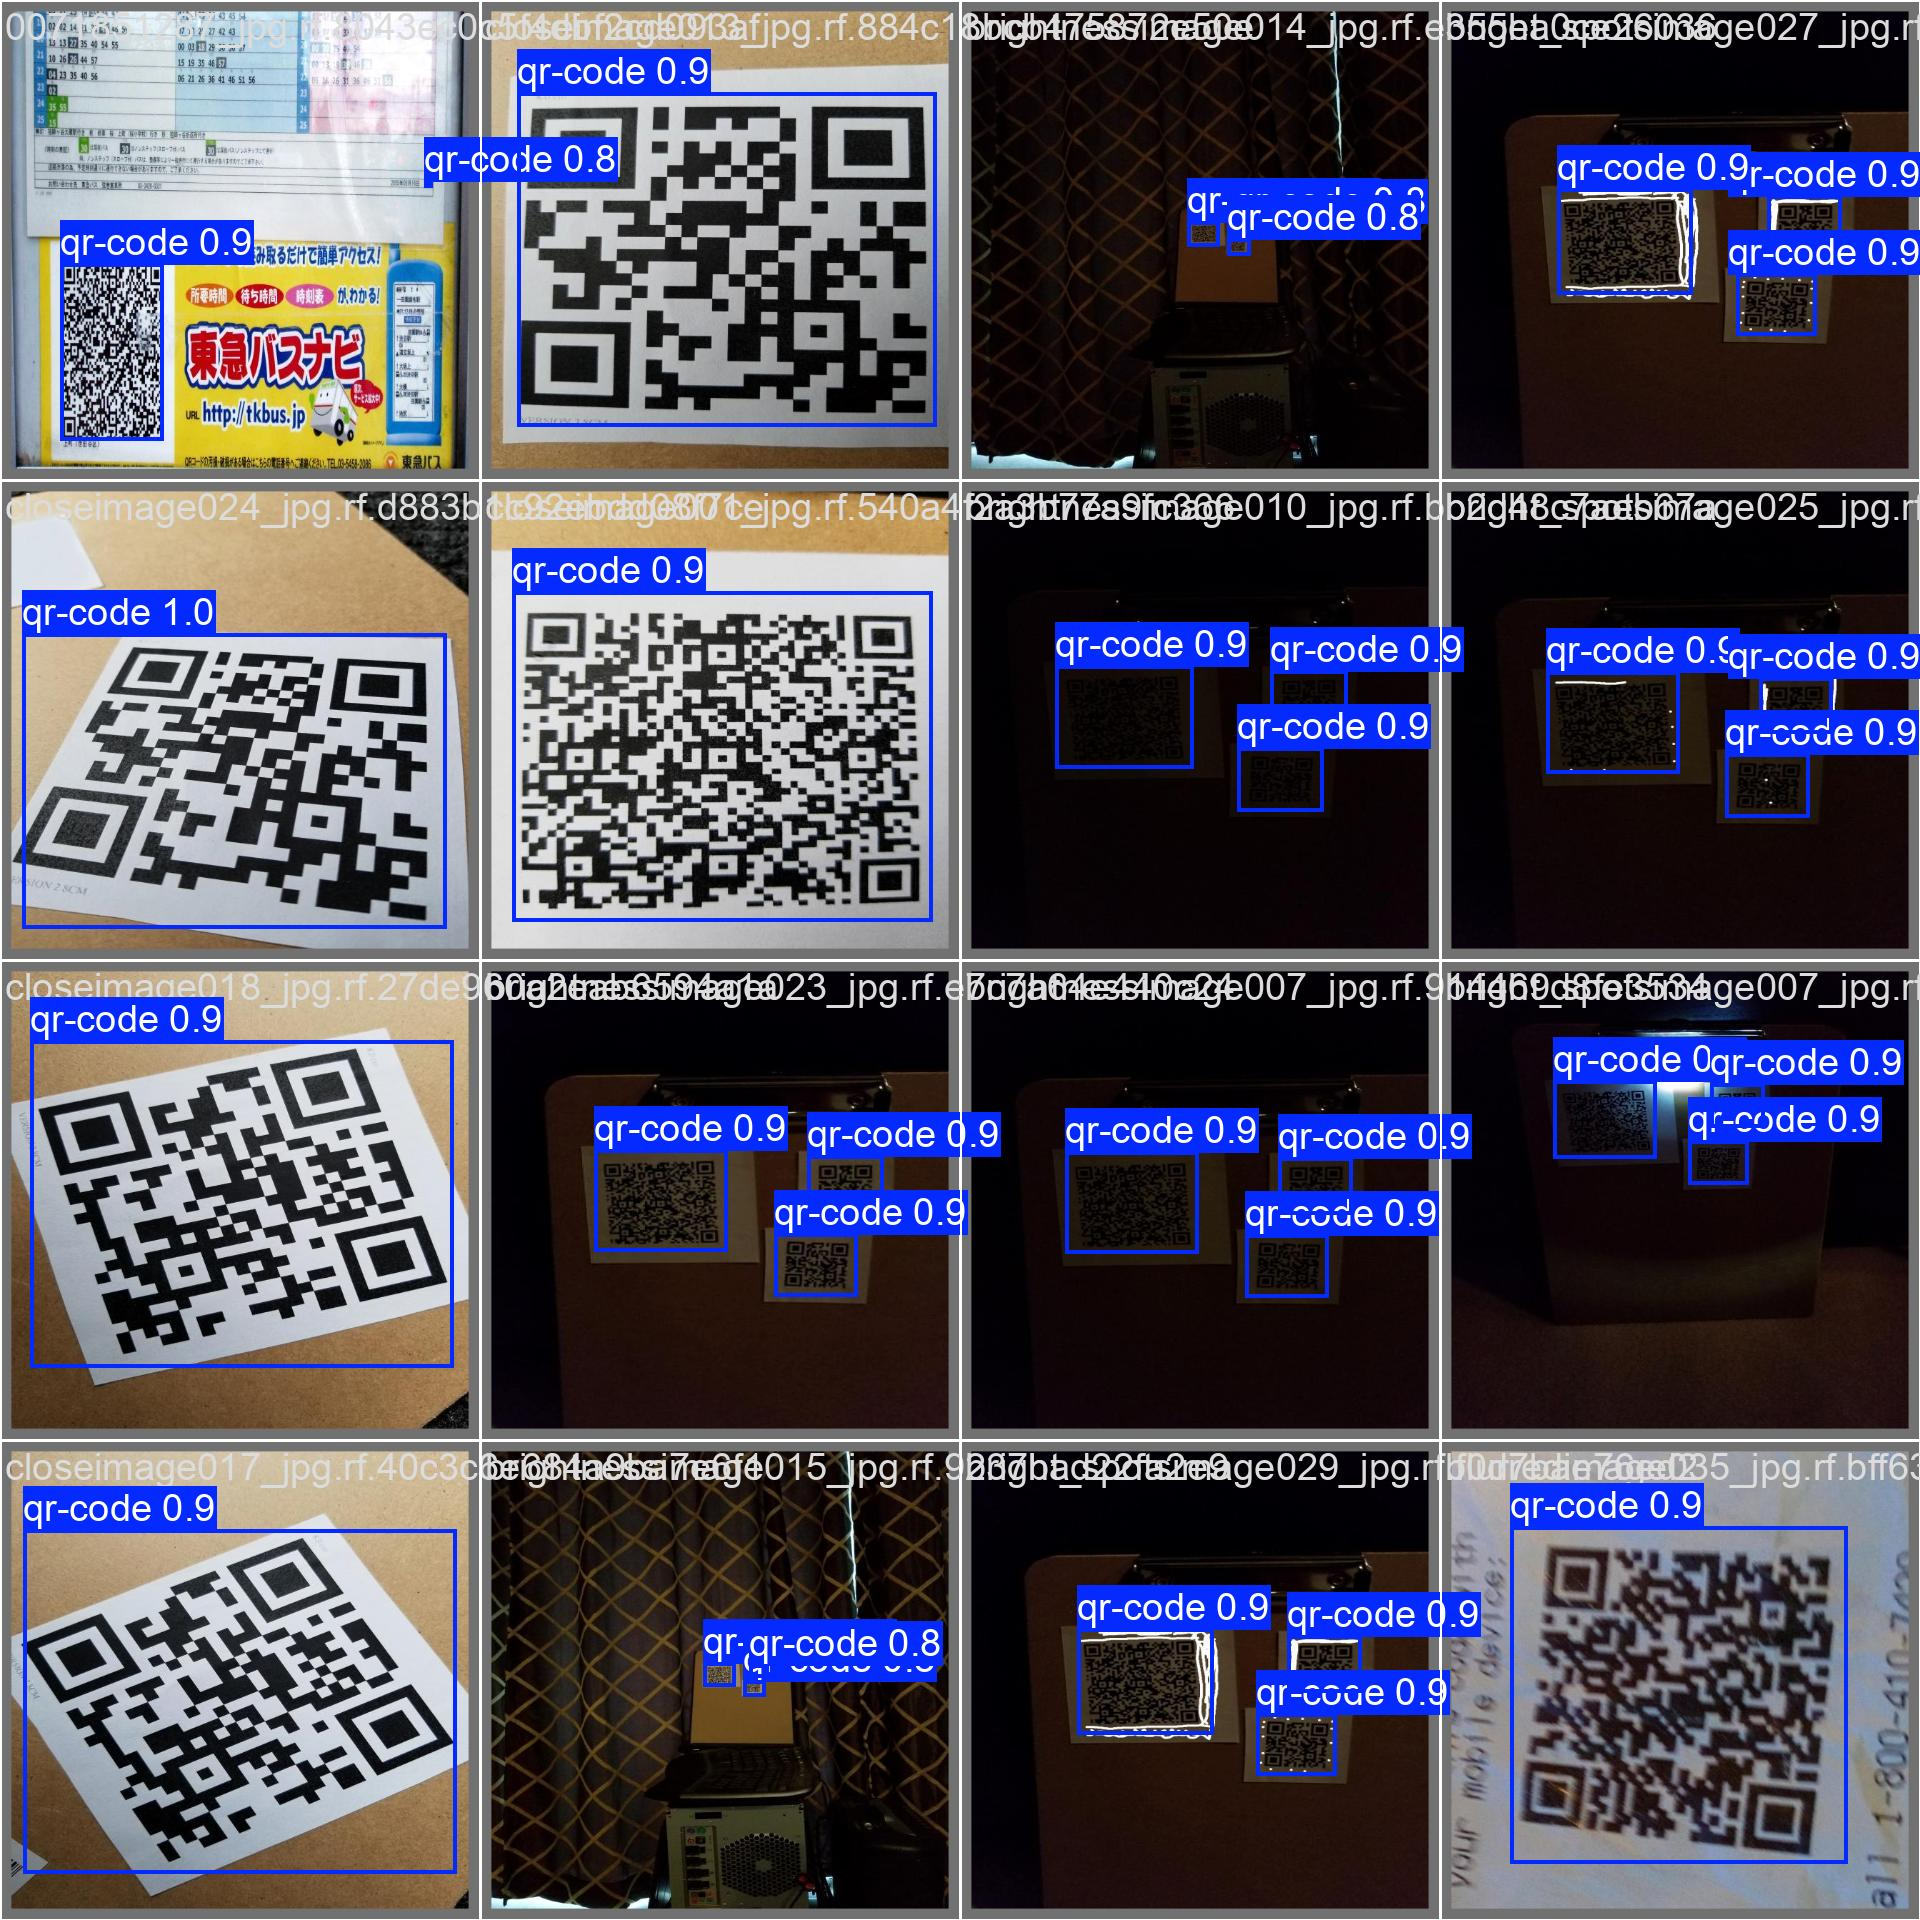

In [ ]:
Image(filename=f'/content/drive/MyDrive/QR_CODE_DETECTOR/datasets/runs/detect/train2/val_batch0_pred.jpg', width=600)

### Model inference on an image

In [ ]:
# Run inference on an image
results = model("/content/drive/MyDrive/QR_CODE_DETECTOR/datasets/valid/images/0071851287_jpg.rf.8043ec0c5f4dbf2cd093af36eaf4cd23.jpg")  # results list

# View results
for r in results:
    print(r.boxes)  # print the Boxes object containing the detection bounding boxes
    print(r.probs)
    print(r.names)


image 1/1 /content/drive/MyDrive/QR_CODE_DETECTOR/datasets/valid/images/0071851287_jpg.rf.8043ec0c5f4dbf2cd093af36eaf4cd23.jpg: 640x640 2 qr-codes, 37.0ms
Speed: 2.2ms preprocess, 37.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.], device='cuda:0')
conf: tensor([0.9368, 0.7793], device='cuda:0')
data: tensor([[ 70.8777, 350.3367, 211.9783, 599.4615,   0.9368,   0.0000],
        [578.1075, 236.0807, 589.6327, 246.3898,   0.7793,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([2, 6])
xywh: tensor([[141.4280, 474.8991, 141.1006, 249.1249],
        [583.8701, 241.2353,  11.5251,  10.3091]], device='cuda:0')
xywhn: tensor([[0.2210, 0.7420, 0.2205, 0.3893],
        [0.9123, 0.3769, 0.0180, 0.0161]], device='cuda:0')
xyxy: tensor([[ 70.8777, 350.3367, 211.9783, 599.4615],
        [578.1075, 236.0807, 589.6327, 246.3898]], device='cuda:0')
xyxyn: 

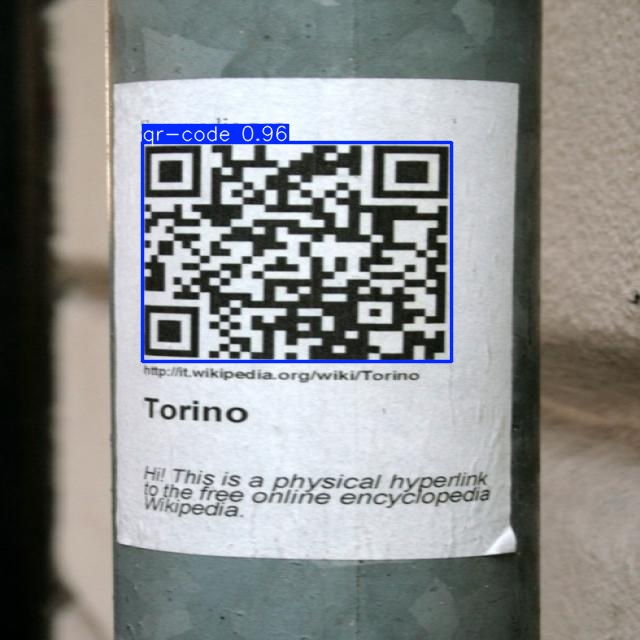

In [ ]:
display(Image(filename="runs/detect/predict/0939831659_jpg.rf.ae54772a5d31f7ddd7b332121fc80331.jpg", height=600))

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/QR_CODE_DETECTOR/datasets/runs/detect/train2/weights/best.pt')  # load a pretrained YOLOv8n pose model
res = model('/content/drive/MyDrive/QR_CODE_DETECTOR/datasets/valid/images/0939831659_jpg.rf.ae54772a5d31f7ddd7b332121fc80331.jpg')
for r in res:
        coordinates = r.boxes.xyxy.tolist()

print(coordinates)


image 1/1 /content/drive/MyDrive/QR_CODE_DETECTOR/datasets/valid/images/0939831659_jpg.rf.ae54772a5d31f7ddd7b332121fc80331.jpg: 640x640 1 qr-code, 37.0ms
Speed: 2.2ms preprocess, 37.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
[[142.35272216796875, 142.2010498046875, 451.2083740234375, 361.174072265625]]


### Detection of QR codes in test images

In [5]:
os.chdir("/content/drive/MyDrive/QR_CODE_DETECTOR/datasets")

In [6]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/QR_CODE_DETECTOR/datasets/runs/detect/train2/weights/best.pt  conf=0.25 source=/content/drive/MyDrive/QR_CODE_DETECTOR/datasets/test/images

Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/155 /content/drive/MyDrive/QR_CODE_DETECTOR/datasets/test/images/0050027974_jpg.rf.269ad5f89a28942eb9ccf09507a77b22.jpg: 640x640 1 qr-code, 37.1ms
image 2/155 /content/drive/MyDrive/QR_CODE_DETECTOR/datasets/test/images/0465484369_jpg.rf.5a008a07ddeab607b4ee760df70c279c.jpg: 640x640 1 qr-code, 51.0ms
image 3/155 /content/drive/MyDrive/QR_CODE_DETECTOR/datasets/test/images/0575557590_jpg.rf.c298437c6e0fac5647c6335f71111142.jpg: 640x640 1 qr-code, 37.2ms
image 4/155 /content/drive/MyDrive/QR_CODE_DETECTOR/datasets/test/images/0858847120_jpg.rf.36d3c000258e62b9b28a739e4fd118d3.jpg: 640x640 1 qr-code, 37.2ms
image 5/155 /content/drive/MyDrive/QR_CODE_DETECTOR/datasets/test/images/1173_U7cZv88QC_jpg.rf.89d791a0e4ca605b3cc55d765504abe5.jpg: 640x640 1 qr-code, 37.2ms
image 6/155 /content/drive/MyDrive/QR_CODE_DETECTO

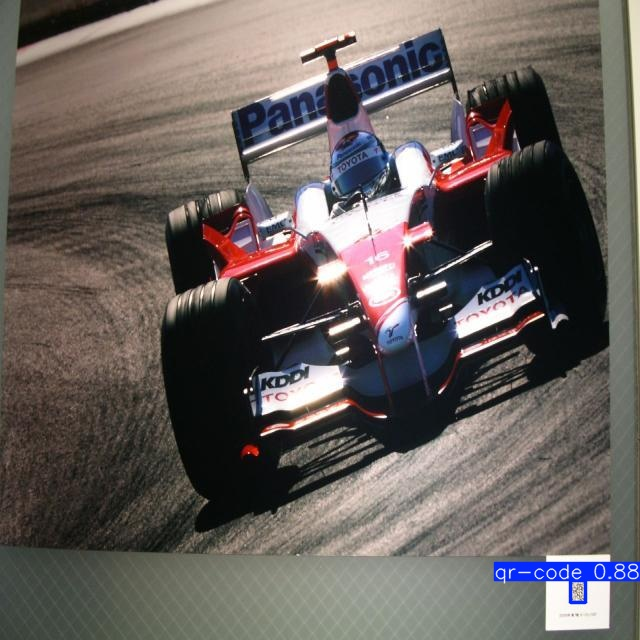

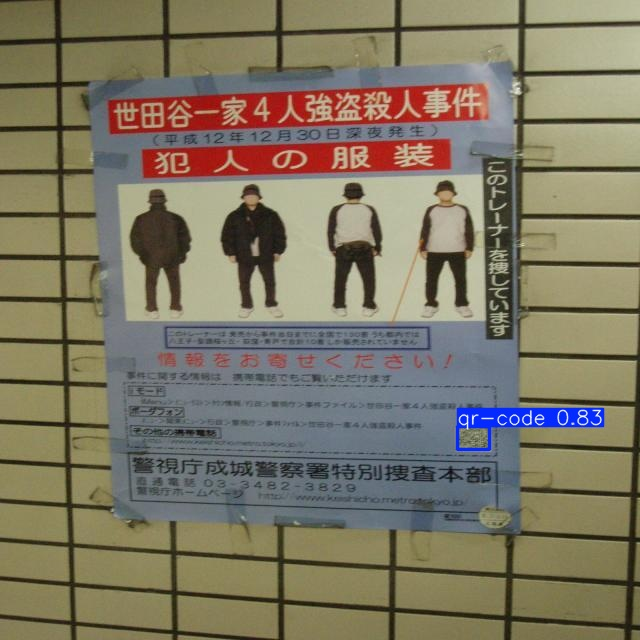

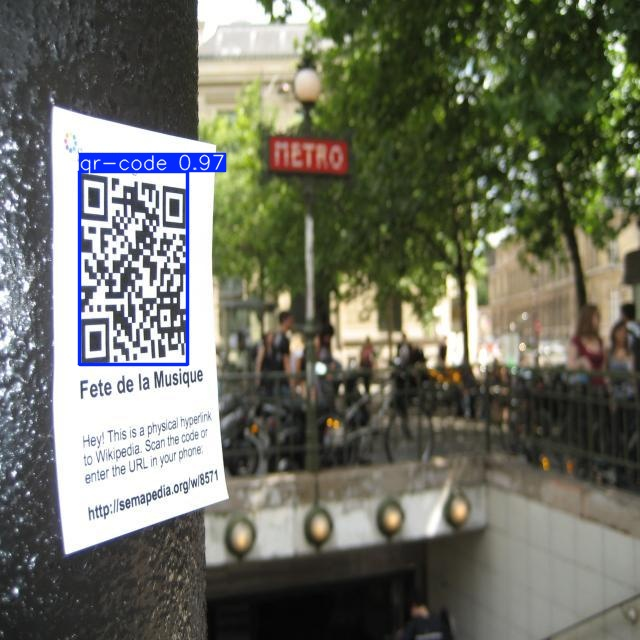

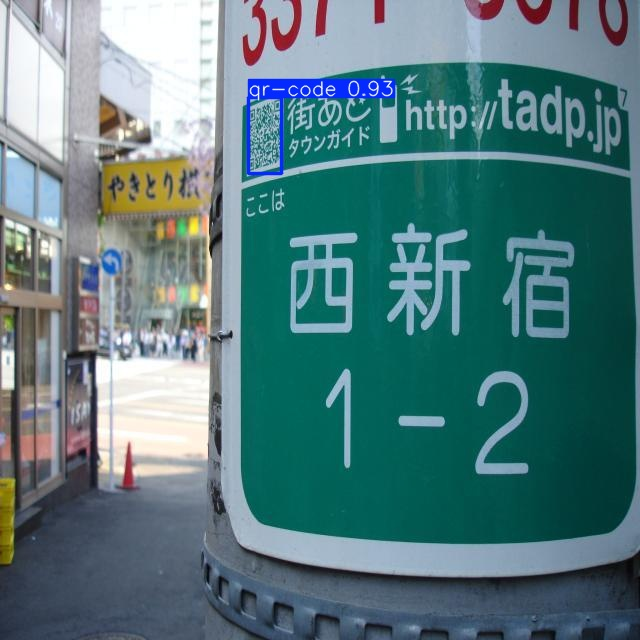

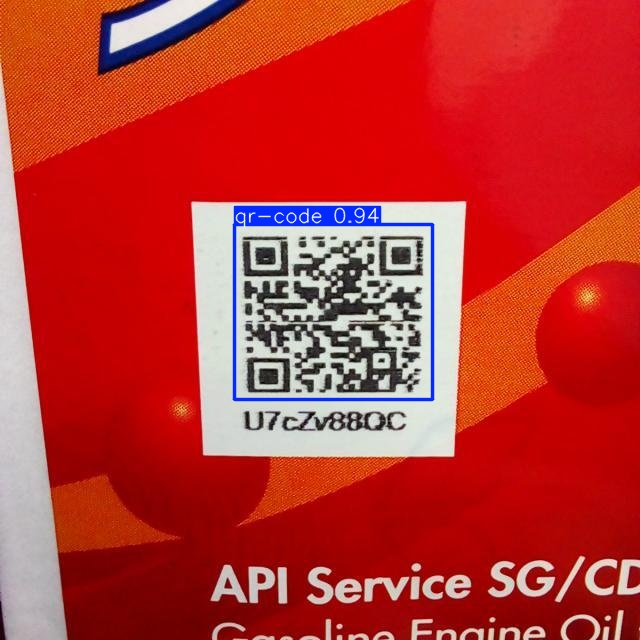

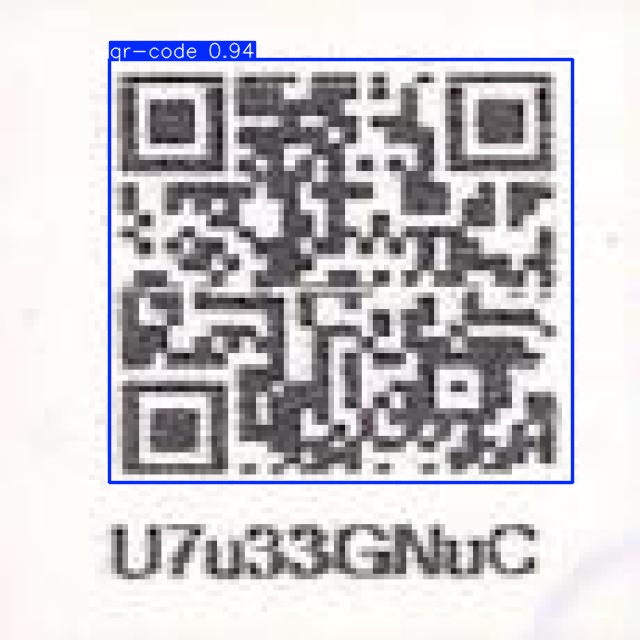

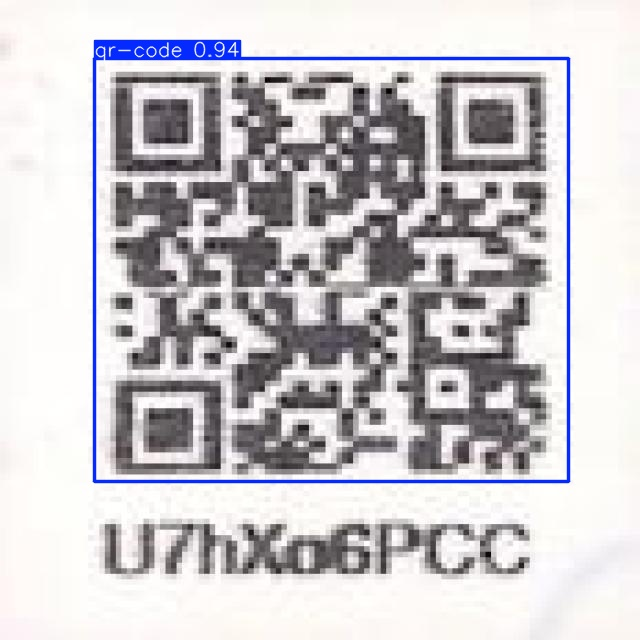

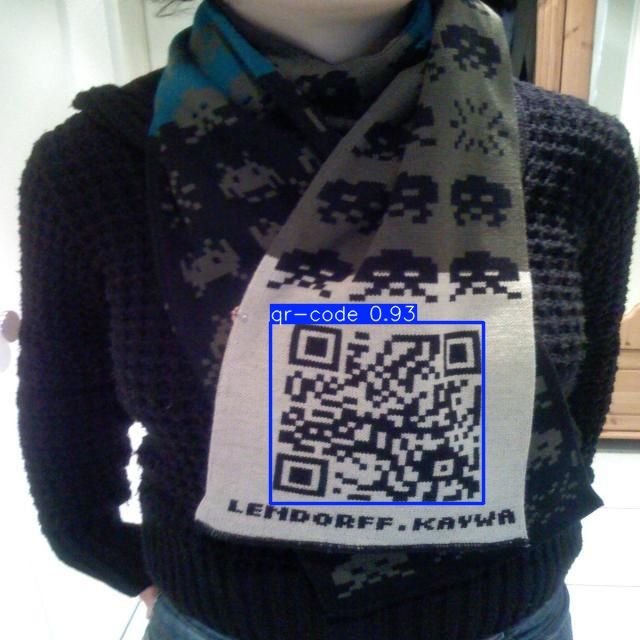

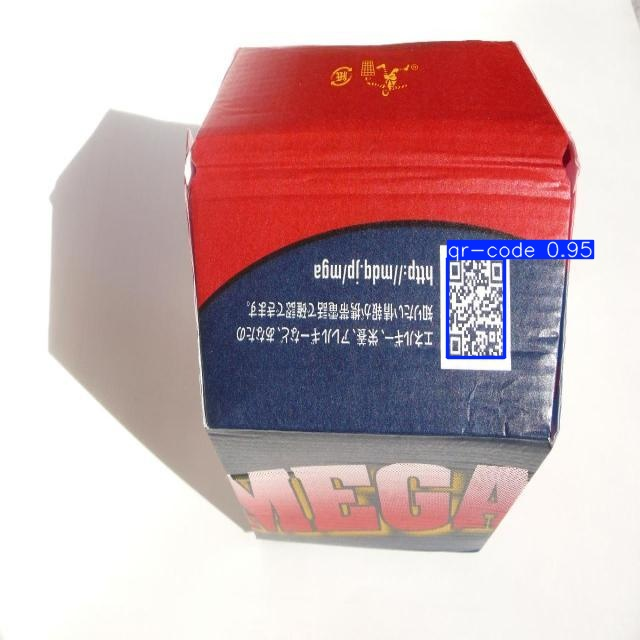

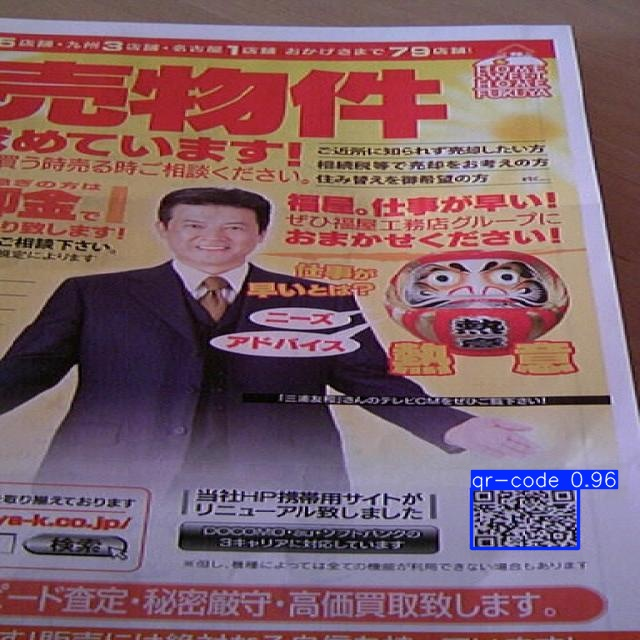

In [7]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict2/*.jpg')[:10]:
  display(Image(filename=image_path, height=600))
  print("\n")